[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                         product_name  product_price  \
49  cello Pack of 18 Opalware Cello Dazzle Lush Fi...         1299.0   
22  Lakm?? Eyeconic Kajal Twin Pack??????????(Deep...          218.0   
28  Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...        13999.0   
39  Singer FM 1409 Electric Sewing MachineÐÒ?ÐÓ...         8499.0   
10  Canon EOS 3000D DSLR Camera 1 Camera Body, 18 ...        30999.0   

    Sentiment  Sentiment_Polarity  Review Count  
49        0.0            0.245098          4362  
22        0.0            0.255085          2805  
28        0.0            0.231171          2122  
39        0.0            0.244624          1743  
10        0.0            0.249800          1646  
                                            product_name  product_price Rate  \
0      Seagate One Touch with Password Protection for...         5599.0    4   
1                    Tanunni Mobile Holder Mobile Holder          171.0    3   
2            Men Regular Fi

C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


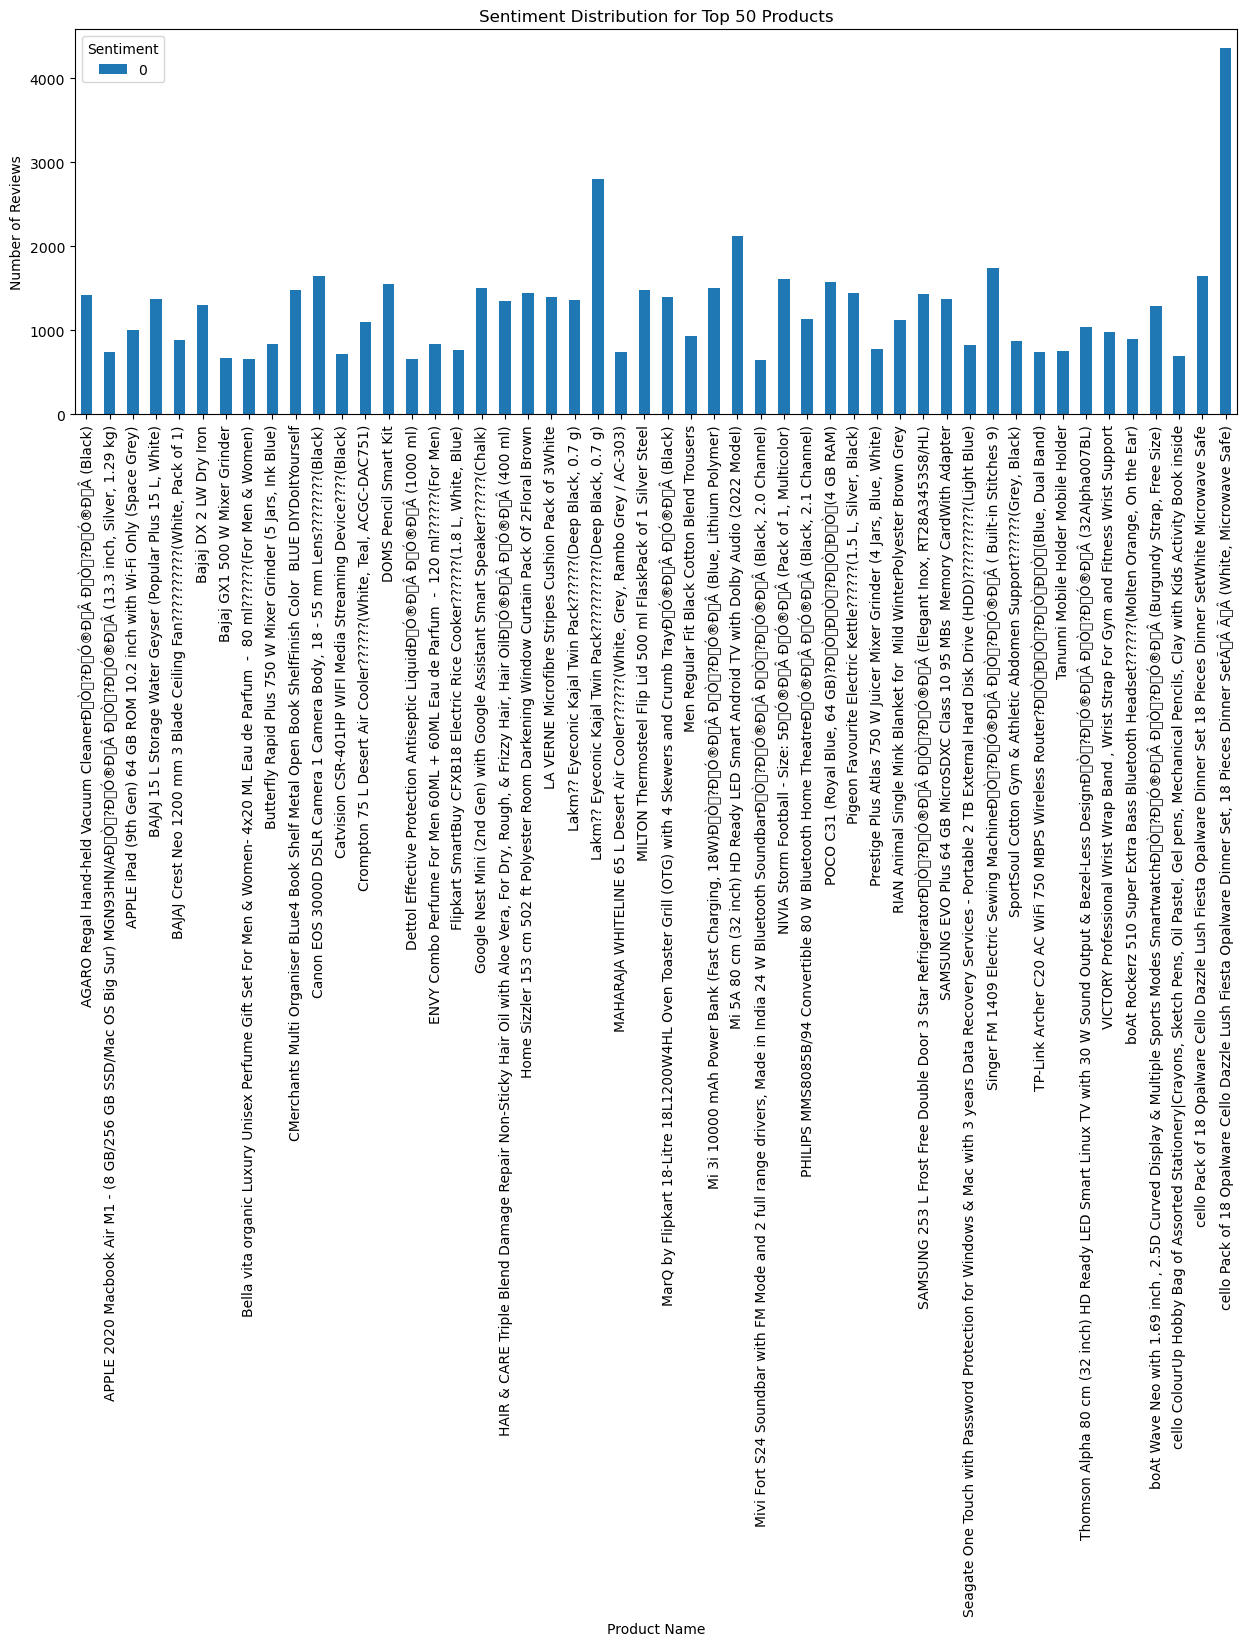

In [3]:
# feature sentiment polarity scores using VADER.

import pandas as pd
import nltk
import plotly.express as px
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
import seaborn as sns

# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\flipkart.csv\Dataset-SA.csv")

# REMOVE MISSING VALUES 
df.dropna(inplace=True)

# REMOVE DUPLICATES ROWS
df.drop_duplicates(inplace=True)

# REMOVE ANY URLS
df['Review'] = df['Review'].apply(lambda x: re.sub(r'http\S+', '', x))

# REMOVE SPECIAL CHARECTER
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# CONVERT ALL TEXT TO LOWERCASE
df['Review'] = df['Review'].apply(lambda x: x.lower())

# REMOVE STOP WORDS
stop_words = set(stopwords.words('english'))
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# STEMMING
stemmer = PorterStemmer()
df['Review'] = df['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# SENTIMENT LEBELS (positive = 1, negative = 0)
df['Sentiment'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# SENTIMENT POLARITY SCORE USING VADER

sid = SentimentIntensityAnalyzer()
df['Sentiment_Polarity'] = df['Review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# TOP  PRODUCTS OVER NUMBER OF REVIEWS
top_products = df.groupby('product_name').size().nlargest(50).index.tolist()

# DATAFRAME ONLY FOR TOP PRODUCTCS
df_top_products = df[df['product_name'].isin(top_products)]

# SHUFFLES  THE ROWS OF THE DATAFRAME
df_top_products = df_top_products.sample(frac=1).reset_index(drop=True)


# CONVERT PRODUCT_PRICE TO NUMERIC

df_top_products['product_price'] = pd.to_numeric(df_top_products['product_price'], errors='coerce')

# BEST SELLING PRODUCTS NAME AND PRICE WITH SENTIMENT

best_selling_product = df_top_products.groupby('product_name').agg({'product_price': 'mean', 'Sentiment': 'mean', 'Sentiment_Polarity': 'mean', 'Review': 'count'}).reset_index()
best_selling_product.rename(columns={'Review': 'Review Count'}, inplace=True)
best_selling_product.sort_values(by=['Review Count', 'Sentiment_Polarity', 'product_price'], ascending=False, inplace=True)
print(best_selling_product.head())

#FUNCTION TO CALCULATE THE SENTIMENT POLARITY OF A REVIEW
def get_sentiment_polarity(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity


df_top_products['Sentiment_Polarity'] = df_top_products['Review'].apply(get_sentiment_polarity)


print(df_top_products)


# GROUPBY METHOD
sentiment_counts = df_top_products.groupby(['product_name', 'Sentiment']).size()

# UNSTACK MATHOD TO SEPERATE COLUMN FOR POSSITIVE AND NEGATIVE SENTIMENT
sentiment_counts = sentiment_counts.unstack()

# VISUALIZE
sentiment_counts.plot(kind='bar', stacked=True, figsize=(15, 5))


plt.title('Sentiment Distribution for Top 50 Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')


plt.show()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                        product_name  product_price  \
0  cello Pack of 18 Opalware Cello Dazzle Lush Fi...         1299.0   
1  Lakm?? Eyeconic Kajal Twin Pack??????????(Deep...          218.0   
2  Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...        13999.0   
3  Singer FM 1409 Electric Sewing MachineÐÒ?ÐÓ...         8499.0   
4  Canon EOS 3000D DSLR Camera 1 Camera Body, 18 ...        30999.0   

   Sentiment  Sentiment_Polarity  Review Count  Average_Rate  
0        0.0            0.245098          4362      4.270518  
1        0.0            0.255085          2805      4.475223  
2        0.0            0.231171          2122      4.131951  
3        0.0            0.244624          1743      4.324727  
4        0.0            0.249800          1646      4.453827  
                                            product_name  product_price  Rate  \
0      Lakm?? Eyeconic Kajal Twin Pack??????????(Deep...          218.0   5.0   
1      Mivi Fort S24 Soundbar wit

C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


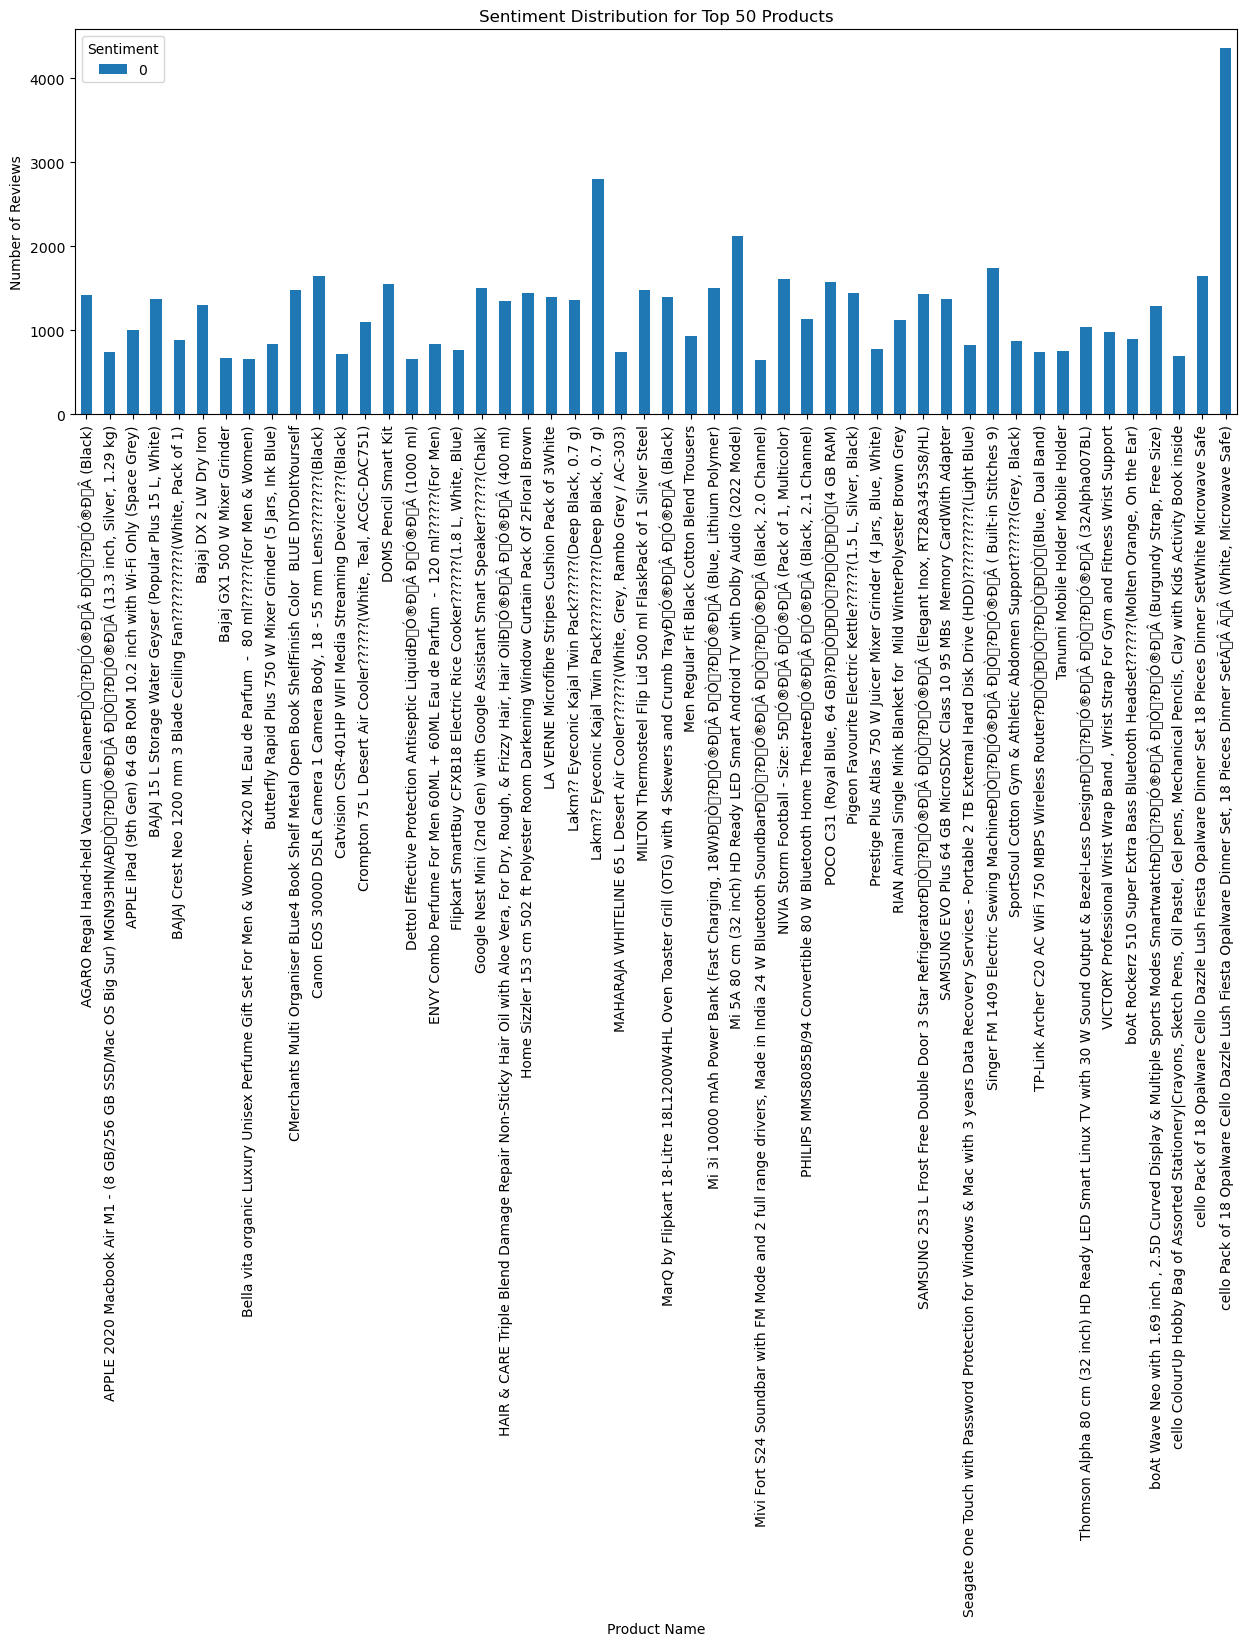

In [4]:
#using average rate feature ..


import pandas as pd
import nltk
import plotly.express as px
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
import seaborn as sns

# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\flipkart.csv\Dataset-SA.csv")

# REMOVE MISSING VALUES 
df.dropna(inplace=True)

# REMOVE DUPLICATES ROWS
df.drop_duplicates(inplace=True)

# REMOVE ANY URLS
df['Review'] = df['Review'].apply(lambda x: re.sub(r'http\S+', '', x))

# REMOVE SPECIAL CHARECTER
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# CONVERT ALL TEXT TO LOWERCASE
df['Review'] = df['Review'].apply(lambda x: x.lower())

# REMOVE STOP WORDS
stop_words = set(stopwords.words('english'))
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# STEMMING
stemmer = PorterStemmer()
df['Review'] = df['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# SENTIMENT LEBELS (positive = 1, negative = 0)
df['Sentiment'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# SENTIMENT POLARITY SCORE USING VADER
sid = SentimentIntensityAnalyzer()
df['Sentiment_Polarity'] = df['Review'].apply(lambda x: sid.polarity_scores(x)['compound'])

#TOP  PRODUCTS OVER NUMBER OF REVIEWS
top_products = df.groupby('product_name').size().nlargest(50).index.tolist()

# DATAFRAME ONLY FOR TOP PRODUCTCS
df_top_products = df[df['product_name'].isin(top_products)]

# SHUFFLES  THE ROWS OF THE DATAFRAME

df_top_products = df_top_products.sample(frac=1).reset_index(drop=True)

# CONVERT PRODUCT_PRICE TO NUMERIC

df_top_products['product_price'] = pd.to_numeric(df_top_products['product_price'], errors='coerce')


# CONVERT RATE COLUMN TO NUMERIC
df_top_products['Rate'] = pd.to_numeric(df_top_products['Rate'], errors='coerce')



# COUNT THE MEAN OF THE RATE COLUMN FOR EACH PRODUCTS
average_rate = df_top_products.groupby('product_name')['Rate'].mean().reset_index()
average_rate.rename(columns={'Rate': 'Average_Rate'}, inplace=True)

# MERGE THE AVERAGE RATE WITH BEST SELLING PRODUCTS
best_selling_product = df_top_products.groupby('product_name').agg({'product_price': 'mean', 'Sentiment': 'mean', 'Sentiment_Polarity': 'mean', 'Review': 'count'}).reset_index()
best_selling_product.rename(columns={'Review': 'Review Count'}, inplace=True)
best_selling_product.sort_values(by=['Review Count', 'Sentiment_Polarity', 'product_price'], ascending=False, inplace=True)
best_selling_product = pd.merge(best_selling_product, average_rate, on='product_name')

#FUNCTION TO CALCULATE THE SENTIMENT POLARITY OF A REVIEW

def get_sentiment_polarity(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity


df_top_products['Sentiment_Polarity'] = df_top_products['Review'].apply(get_sentiment_polarity)




print(best_selling_product.head())
print(df_top_products)

#GROUPBY METHOD
sentiment_counts = df_top_products.groupby(['product_name', 'Sentiment']).size()

# UNSTACK MATHOD TO SEPERATE COLUMN FOR POSSITIVE AND NEGATIVE SENTIMENT
sentiment_counts = sentiment_counts.unstack()

#VISUALIZE
sentiment_counts.plot(kind='bar', stacked=True, figsize=(15, 5))


plt.title('Sentiment Distribution for Top 50 Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')


plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                        product_name  product_price  \
0  cello Pack of 18 Opalware Cello Dazzle Lush Fi...         1299.0   
1  Lakm?? Eyeconic Kajal Twin Pack??????????(Deep...          218.0   
2  Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...        13999.0   
3  Singer FM 1409 Electric Sewing MachineÐÒ?ÐÓ...         8499.0   
4  Canon EOS 3000D DSLR Camera 1 Camera Body, 18 ...        30999.0   

   Sentiment  Sentiment_Polarity  Review Count  Average_Rate  
0        0.0            0.245098          4362      4.270518  
1        0.0            0.255085          2805      4.475223  
2        0.0            0.231171          2122      4.131951  
3        0.0            0.244624          1743      4.324727  
4        0.0            0.249800          1646      4.453827  
                                            product_name  product_price  Rate  \
0      VICTORY Professional Wrist Wrap Band , Wrist S...          109.0   4.0   
1      Butterfly Rapid Plus 750 W

C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


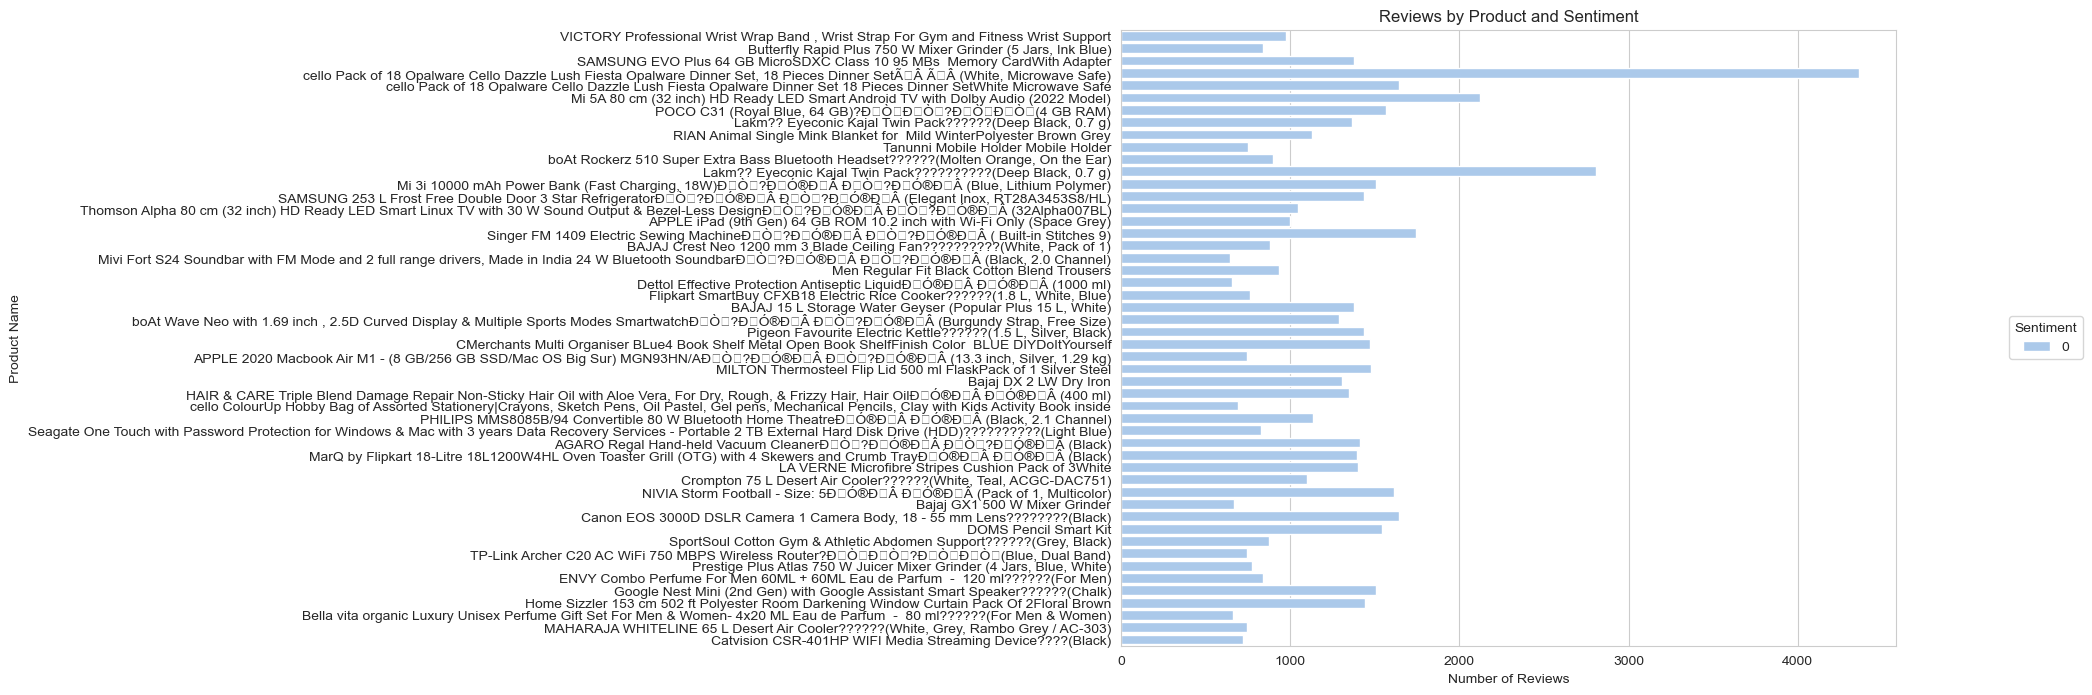

In [6]:
import pandas as pd
import nltk
import plotly.express as px
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
import seaborn as sns

# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\flipkart.csv\Dataset-SA.csv")

# REMOVE MISSING VALUES 
df.dropna(inplace=True)

# REMOVE DUPLICATES ROWS
df.drop_duplicates(inplace=True)

# REMOVE ANY URLS
df['Review'] = df['Review'].apply(lambda x: re.sub(r'http\S+', '', x))

# REMOVE SPECIAL CHARECTER
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# CONVERT ALL TEXT TO LOWERCASE
df['Review'] = df['Review'].apply(lambda x: x.lower())

# REMOVE STOP WORDS
stop_words = set(stopwords.words('english'))
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# STEMMING
stemmer = PorterStemmer()
df['Review'] = df['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# SENTIMENT LEBELS (positive = 1, negative = 0)
df['Sentiment'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# SENTIMENT POLARITY SCORE USING VADER
sid = SentimentIntensityAnalyzer()
df['Sentiment_Polarity'] = df['Review'].apply(lambda x: sid.polarity_scores(x)['compound'])

#TOP  PRODUCTS OVER NUMBER OF REVIEWS
top_products = df.groupby('product_name').size().nlargest(50).index.tolist()

# DATAFRAME ONLY FOR TOP PRODUCTCS
df_top_products = df[df['product_name'].isin(top_products)]

# SHUFFLES  THE ROWS OF THE DATAFRAME

df_top_products = df_top_products.sample(frac=1).reset_index(drop=True)

# CONVERT PRODUCT_PRICE TO NUMERIC

df_top_products['product_price'] = pd.to_numeric(df_top_products['product_price'], errors='coerce')


# CONVERT RATE COLUMN TO NUMERIC
df_top_products['Rate'] = pd.to_numeric(df_top_products['Rate'], errors='coerce')



# COUNT THE MEAN OF THE RATE COLUMN FOR EACH PRODUCTS
average_rate = df_top_products.groupby('product_name')['Rate'].mean().reset_index()
average_rate.rename(columns={'Rate': 'Average_Rate'}, inplace=True)

# MERGE THE AVERAGE RATE WITH BEST SELLING PRODUCTS
best_selling_product = df_top_products.groupby('product_name').agg({'product_price': 'mean', 'Sentiment': 'mean', 'Sentiment_Polarity': 'mean', 'Review': 'count'}).reset_index()
best_selling_product.rename(columns={'Review': 'Review Count'}, inplace=True)
best_selling_product.sort_values(by=['Review Count', 'Sentiment_Polarity', 'product_price'], ascending=False, inplace=True)
best_selling_product = pd.merge(best_selling_product, average_rate, on='product_name')

#FUNCTION TO CALCULATE THE SENTIMENT POLARITY OF A REVIEW

def get_sentiment_polarity(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity


df_top_products['Sentiment_Polarity'] = df_top_products['Review'].apply(get_sentiment_polarity)




print(best_selling_product.head())
print(df_top_products)


# VISUALIZE
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.figure(figsize=(10, 8))
sns.countplot(y="product_name", hue="Sentiment", data=df_top_products)
plt.xlabel("Number of Reviews")
plt.ylabel("Product Name")
plt.title("Reviews by Product and Sentiment")
plt.legend(title="Sentiment", loc="center right", bbox_to_anchor=(1.25, 0.5))
plt.show()